# Nutrition Plotting

The following notebook was created in May 2020 as a fun exercise and a convenient visualization tool of the caloric and macronutrient content of food. The intent was to allow side-by-side comparison of various food items interms of calories per 100g, as well as relative calorie contributions from fat, protein, and carbohydrates. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.tri as tri

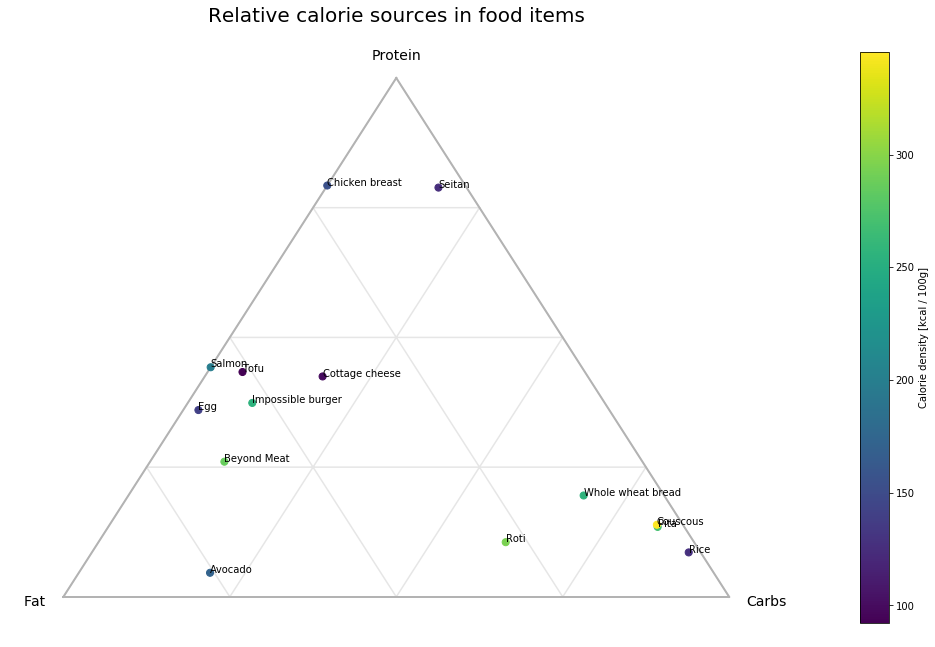

In [2]:
# Load the data
df = pd.read_excel('Nutrition.xlsx', sheet_name='Partial')

# Calculate values
df['Fat_calories'] = df['Fat']*9
df['Carbs_calories'] = df['Carbs']*4
df['Protein_calories'] = df['Protein']*4
df['Calories'] = df['Fat_calories'] + df['Carbs_calories'] + df['Protein_calories']
df['Calorie_density'] = 100 * df['Calories'] / df['Weight']
df['Fat_rel_cal'] = df['Fat_calories'] / df['Calories']
df['Carbs_rel_cal'] = df['Carbs_calories'] / df['Calories']
df['Protein_rel_cal'] = df['Protein_calories'] / df['Calories']

# Transform values to ternary plot coordinates
a = df['Carbs_rel_cal']
b = df['Protein_rel_cal']
x = a + 0.5 * b
y = 0.5 * np.sqrt(3) * b

# Create triangle for ternary plot
corners = np.array([[0, 0], [1, 0], [0.5,  0.5 * np.sqrt(3)]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

# Create the grid
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=2)
fig, ax = plt.subplots(figsize=(17.5, 10.5))
ax.triplot(trimesh, '', color='0.9', zorder = 1)

# Plot and label the points
colormap = plt.cm.get_cmap('viridis')
im = ax.scatter(x, y, c=df['Calorie_density'], s=50, zorder=10, cmap=colormap)
for i, txt in enumerate(df['Item']):
    ax.annotate(txt, (x[i], y[i]), zorder=11)

# Plot the axes
ax.plot([corners[0][0], corners[1][0]], [corners[0][1], corners[1][1]], color='0.7', linestyle='-', linewidth=2)
ax.plot([corners[0][0], corners[2][0]], [corners[0][1], corners[2][1]], color='0.7', linestyle='-', linewidth=2)
ax.plot([corners[1][0], corners[2][0]], [corners[1][1], corners[2][1]], color='0.7', linestyle='-', linewidth=2)

# Label the axes and add title
text_space = 0.03
ax.text(-text_space*np.sqrt(3)/2, -text_space/2, 'Fat', ha='right', fontsize=14)
ax.text(1 + text_space*np.sqrt(3)/2, -text_space/2, 'Carbs', ha='left', fontsize=14)
ax.text(0.5, 0.5*np.sqrt(3) + text_space, 'Protein', ha='center', fontsize=14)
ax.set_title('Relative calorie sources in food items', fontsize=20, pad=30)
fig.colorbar(im, ax=ax, label='Calorie density [kcal / 100g]', pad=0.1)
plt.axis('off')
plt.show()

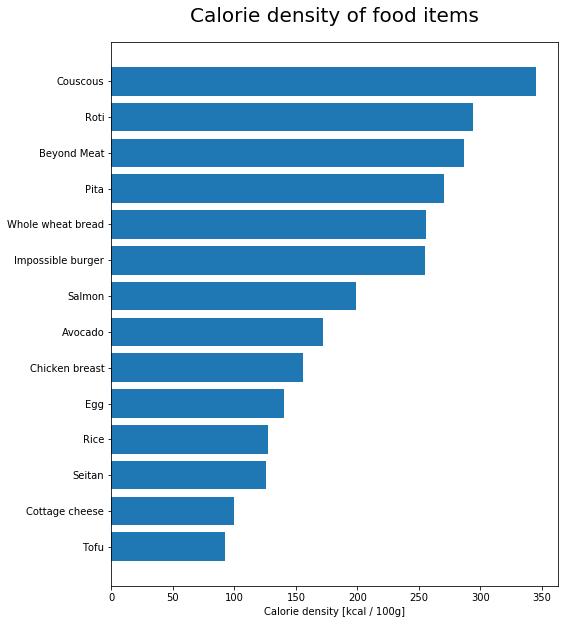

In [3]:
fig, ax = plt.subplots(figsize=(8, 10))

density = df[['Item', 'Calorie_density']].copy()
density.sort_values(by='Calorie_density', inplace=True)

ax.barh(density['Item'], density['Calorie_density'])
ax.set_title('Calorie density of food items', fontsize=20, pad=20)
ax.set_xlabel('Calorie density [kcal / 100g]')
plt.show()